In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')
## グラフで日本語表示
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IPAPGothic'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
rcParams["font.size"] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
import gc


drop_columns = ["category","media_name","account_name","campaign_name","adgroup_name"]
def delete_fractional_portion(id):
    if id.endswith(".0"):
        return id[:-2]
    return id
def read_pitch(path, encoding=None,delimiter=None):
    _df = pd.read_csv(path, encoding=encoding,delimiter=delimiter)
    _df["tfs_zulu"] = pd.to_datetime(_df["tfs_zulu"])
    return _df.sort_values(by=["gid", "tfs_zulu"])
pd.set_option('display.max_columns', 150)

In [2]:
p_df=read_pitch("pitch_df.csv")
p_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid
425603,1,top,608665,446359,R,SI,93.7,84.5,233.718,2632.270,-10.721801,7.870604,0.239615,1.848781,-0.869064,50.0,-19.911162,32.791492,-17.557766,6.687156,-136.134526,-7.015046,3.311768,1.564115,23.7,43.7,5.8,9.0,46.0,NaN,NaN,S,C,3,Called Strike,2018-03-29 20:07:39+00:00,gid_2018_03_29_anamlb_oakmlb_1
425604,1,top,608665,446359,R,SI,94.0,85.8,236.246,2561.181,-10.647298,7.115135,-0.804047,0.925201,-0.942066,50.0,-20.043108,30.911711,-18.780096,4.093632,-136.551337,-9.145946,3.647501,1.601877,23.8,42.7,6.1,13.0,46.0,NaN,NaN,B,B,4,Ball,2018-03-29 20:08:07+00:00,gid_2018_03_29_anamlb_oakmlb_1
425605,1,top,608665,446359,R,SI,94.7,86.5,237.996,2673.854,-11.206094,7.003230,0.598637,1.616677,-0.705522,50.0,-21.510485,30.321994,-18.731107,7.501741,-137.628790,-7.507958,3.297457,1.426851,23.8,44.4,6.0,9.0,53.0,NaN,NaN,S,C,5,Called Strike,2018-03-29 20:08:21+00:00,gid_2018_03_29_anamlb_oakmlb_1
425606,1,top,608665,446359,R,SL,82.3,76.7,38.861,959.909,3.397188,-4.215796,1.453223,1.466314,-0.732282,50.0,4.974062,21.571764,-38.346692,4.136962,-119.812434,-2.125677,3.230198,1.360572,23.9,-8.2,10.8,14.0,22.0,NaN,NaN,S,F,6,Foul,2018-03-29 20:08:39+00:00,gid_2018_03_29_anamlb_oakmlb_1
425607,1,top,608665,446359,R,SI,95.4,87.1,241.080,2408.148,-10.308374,5.695114,-0.427914,2.490041,-0.802268,50.0,-20.172978,30.364878,-21.028992,4.703063,-138.845494,-5.049660,3.230198,1.360572,23.8,40.9,6.1,4.0,36.0,NaN,NaN,S,S,7,Swinging Strike,2018-03-29 20:09:01+00:00,gid_2018_03_29_anamlb_oakmlb_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180182,9,top,595014,571912,R,SI,96.3,87.5,259.978,2096.383,-10.101974,1.785277,-1.696998,1.804904,-2.857898,50.0,-19.907688,33.245884,-28.655852,6.811216,-139.904101,-6.942074,3.136510,1.421589,23.8,31.3,7.3,13.0,35.0,NaN,NaN,B,B,621,Ball,2018-08-01 05:15:06+00:00,gid_2018_07_31_tormlb_oakmlb_1
180183,9,top,595014,571912,R,SI,95.0,87.4,262.213,2146.210,-10.503546,1.436401,-0.873343,0.922357,-2.728790,50.0,-20.178195,30.275398,-29.414602,8.755587,-137.668866,-9.047341,3.048678,1.421589,23.8,30.5,7.7,13.0,49.0,NaN,NaN,B,*B,622,Ball In Dirt,2018-08-01 05:15:29+00:00,gid_2018_07_31_tormlb_oakmlb_1
180184,9,top,595014,571912,R,SI,96.1,88.5,255.300,2112.491,-9.847289,2.583313,-0.808788,2.306196,-2.797219,50.0,-19.643499,27.618337,-27.020823,9.052322,-139.469204,-6.061977,3.158467,1.465538,23.9,32.5,6.8,13.0,47.0,NaN,NaN,S,C,623,Called Strike,2018-08-01 05:15:53+00:00,gid_2018_07_31_tormlb_oakmlb_1
180185,9,top,595014,571912,R,SI,94.6,87.4,236.868,1768.153,-7.256016,4.735742,0.039496,2.762812,-2.747244,50.0,-14.012942,27.062477,-23.028303,10.162823,-137.298664,-5.432391,3.048678,1.399614,23.9,26.7,5.6,2.0,31.0,NaN,NaN,S,F,624,Foul,2018-08-01 05:16:13+00:00,gid_2018_07_31_tormlb_oakmlb_1


In [3]:
p_df.sort_values(by="spin_rate", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid
280549,7,top,543118,542303,R,CU,79.7,78.3,29.793,6503.791,17.779539,-31.052488,0.432227,1.696940,1.280122,50.0,25.763879,7.393863,-77.171421,-7.476743,-115.662976,11.243198,3.434615,1.404008,24.2,-18.4,22.2,9.0,32.0,NaN,NaN,S,S,407,Swinging Strike,2018-04-05 01:32:15+00:00,gid_2018_04_04_slnmlb_milmlb_1
308075,6,bottom,572020,624585,R,FF,96.6,88.8,157.690,6122.968,11.892798,28.981066,0.690724,3.001862,1.710254,50.0,22.356344,44.946248,22.305201,-6.892442,-139.529668,-12.304510,3.414375,1.445813,23.5,227.7,5.9,3.0,46.0,NaN,NaN,X,D,409,"In play, no out",2018-04-11 20:04:51+00:00,gid_2018_04_11_seamlb_kcamlb_1
26436,1,top,448855,571697,L,FF,95.8,84.4,173.630,5189.818,2.933627,26.269562,0.682273,1.910063,-0.978041,50.0,5.488818,40.372251,16.976319,3.448579,-138.250839,-14.773393,3.024208,1.275258,23.6,207.4,3.1,6.0,43.0,NaN,NaN,X,X,35,"In play, out(s)",2018-04-17 23:50:34+00:00,gid_2018_04_17_cinmlb_milmlb_1
56913,6,top,623451,519203,L,SL,93.1,85.7,169.815,4989.782,4.608803,25.649498,-0.610040,4.859696,-1.808824,50.0,8.216405,39.045390,13.552935,1.586176,-135.080556,-4.786976,3.475556,1.730205,23.6,215.5,3.4,11.0,60.0,NaN,NaN,B,B,378,Ball,2018-05-19 02:39:28+00:00,gid_2018_05_18_chnmlb_cinmlb_1
26472,3,top,448855,571740,L,FF,93.5,82.4,163.692,4760.372,6.979662,23.854494,0.633729,2.578892,-0.305947,50.0,12.464596,39.453156,10.426384,0.101593,-135.273269,-11.667188,3.316112,1.396044,23.6,240.7,3.3,6.0,39.0,NaN,NaN,X,X,118,"In play, out(s)",2018-04-18 00:15:10+00:00,gid_2018_04_17_cinmlb_milmlb_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72489,8,top,608716,452095,R,NaN,95.2,86.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,F,548,Foul,2018-05-13 01:50:50+00:00,gid_2018_05_12_atlmlb_miamlb_1
72490,8,top,608716,452095,R,NaN,83.7,77.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,*B,549,Ball In Dirt,2018-05-13 01:51:15+00:00,gid_2018_05_12_atlmlb_miamlb_1
72491,8,top,608716,452095,R,NaN,88.9,82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,*B,550,Ball In Dirt,2018-05-13 01:51:47+00:00,gid_2018_05_12_atlmlb_miamlb_1
72492,8,top,608716,452095,R,NaN,95.6,87.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,F,551,Foul,2018-05-13 01:52:09+00:00,gid_2018_05_12_atlmlb_miamlb_1


In [4]:
p_df[p_df["pitcher_id"]==572020].groupby("pitch_type")[["spin_rate"]].agg(["min","mean","median", "max"]).reset_index()#.mean().reset_index()

pitch_type spin_rate                                 
                   min         mean    median       max
0         CH  1505.629  1936.129667  1966.432  2455.879
1         FC   215.446   734.995273   720.582  1651.023
2         FF  1645.145  2467.558646  2450.397  6122.968
3         KC    80.488   859.317323   863.980  2122.240

In [5]:
p_df.groupby("pitch_type")[["spin_rate"]].agg(["min","mean","median", "max"]).reset_index().sort_values(by=("spin_rate","median"),ascending=False)

pitch_type spin_rate                                  
                    min         mean     median       max
0          AB  3659.948  3659.948000  3659.9480  3659.948
8          FT   399.161  2145.207474  2181.3340  3521.506
5          FF   211.037  2106.116499  2136.0290  6122.968
13         SI   637.202  2103.612005  2123.7320  3663.240
11         PO  1261.620  1894.025164  1884.7990  2505.845
6          FO  1061.683  1848.785698  1883.5920  2415.394
1          CH    41.726  1722.668740  1757.0640  3377.311
12         SC  1344.803  1616.863655  1577.1300  1996.052
3          EP   569.027  1488.895960  1509.2520  1875.807
7          FS   109.447  1403.738521  1416.3540  3033.568
2          CU     7.527  1249.722916  1309.3240  6503.791
9          KC    10.703  1203.006086  1274.8220  2426.804
4          FC     5.602  1024.014740   976.1280  2981.388
14         SL     2.325   727.236595   655.3610  4989.782
10         KN    31.382   691.553335   621.6725  2198.452

In [6]:
p_type = pd.DataFrame(p_df["pitch_type"].unique()).reset_index()
p_type.columns = ["pitch_type_id", "pitch_type"]
p_type

,pitch_type_id,pitch_type
0,0,SI
1,1,SL
2,2,FF
3,3,FC
4,4,CU
5,5,CH
6,6,FT
7,7,FS
8,8,KC
9,9,EP


In [7]:
p_df = pd.merge(p_df, p_type, how="inner", on="pitch_type")

In [8]:
p_df[p_df["gid"]=="gid_2018_04_01_anamlb_oakmlb_1"]["pitcher_id"].unique()

array([543056, 502028, 660271, 605254, 592135, 433586, 641871, 433589,
       488748, 501822, 453284])

In [9]:
p_df.groupby("pitcher_id").count().reset_index().sort_values(by="px", ascending=False)

,pitcher_id,inning_num,top_bottom,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
282,545333,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,0,0,2493,2484,2493,2493,2493,2493,2493
61,453286,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,2358,0,0,2358,2350,2358,2358,2358,2358,2358
18,434378,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,0,0,2356,2349,2356,2356,2356,2356,2356
188,518633,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,0,0,2350,2347,2350,2350,2350,2350,2350
39,448306,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,0,0,2314,2309,2314,2314,2314,2314,2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,607387,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,8,8,8,8,8,8,8
32,446386,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,8,8,8,8,8,8,8
226,534606,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,5,5,5,5,5
40,448602,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,3


In [10]:
names_df = pd.read_csv("other_data/mlb-pitch-data-20152018/player_names.csv")
names_df[names_df["last_name"]=="Ohtani"]

,id,first_name,last_name
1152,660271,Shohei,Ohtani


In [11]:
names_df[names_df["id"].isin([605254, 660271, 433589, 488748, 501822, 543056, 592135, 433586,
       502028, 453284, 641871])]

,id,first_name,last_name
92,501822,Chris,Hatcher
103,433586,Santiago,Casilla
159,433589,Yusmeiro,Petit
407,592135,Cam,Bedrosian
466,543056,Danny,Coulombe
741,488748,Ryan,Buchter
748,502028,Blake,Wood
892,453284,Blake,Parker
993,641871,Keynan,Middleton
1033,605254,Daniel,Gossett


In [12]:
names_df[names_df["id"] == 572020]

,id,first_name,last_name
119,572020,James,Paxton


In [13]:
ohtani = 660271
ohtani_df = p_df[p_df["pitcher_id"]==ohtani]
ohtani_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
40693,1,bottom,660271,543760,R,SL,81.5,74.7,106.612,1415.788,7.778194,2.320582,0.209670,3.433696,-2.237738,50.0,11.101823,22.703018,-28.861880,3.368222,-118.717215,0.028016,3.329010,1.459250,23.8,-22.0,8.8,12.0,33.0,NaN,NaN,S,S,25,Swinging Strike,2018-04-01 20:14:09+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40694,1,bottom,660271,543760,R,SL,83.6,76.8,120.709,1467.112,7.010907,4.164236,0.239599,3.669399,-2.227319,50.0,10.581381,22.471270,-25.889075,3.746613,-121.701608,-0.279185,3.586549,1.657899,23.8,-23.4,7.6,12.0,33.0,NaN,NaN,B,B,26,Ball,2018-04-01 20:14:29+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40695,1,bottom,660271,476704,L,SL,83.7,76.4,121.516,1375.461,6.536371,4.007907,-0.970258,4.208338,-2.373291,50.0,9.854621,23.627923,-26.131491,1.333821,-121.926649,0.969022,3.567411,1.665165,23.8,-21.2,7.5,11.0,36.0,NaN,NaN,B,B,35,Ball,2018-04-01 20:16:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40700,2,bottom,660271,501981,R,SL,81.7,75.2,103.904,1004.585,5.545926,1.372928,-0.383614,3.026456,-2.297629,50.0,7.993412,21.428396,-30.195231,2.808068,-118.922180,-0.911539,3.803499,1.705152,23.9,-15.5,8.8,4.0,56.0,NaN,NaN,S,C,92,Called Strike,2018-04-01 20:32:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40701,2,bottom,660271,501981,R,SL,82.2,75.1,107.146,1501.554,8.150797,2.514680,-0.404470,4.053447,-2.279994,50.0,11.838293,22.874340,-28.521704,1.930547,-119.699813,1.039250,3.389016,1.448805,23.8,-23.2,8.6,11.0,20.0,NaN,NaN,S,S,93,Swinging Strike,2018-04-01 20:33:16+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457167,4,top,660271,460086,L,FS,81.2,74.3,270.799,751.974,-4.306007,-0.059990,-0.842587,5.258551,-1.798684,50.0,-6.120555,21.122415,-32.259318,3.544202,-118.095293,4.398790,3.261391,1.630699,23.8,9.9,9.1,11.0,35.0,NaN,NaN,B,B,216,Ball,2018-06-07 03:14:33+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457168,4,top,660271,572365,L,FS,84.3,76.9,229.857,1069.569,-4.581086,3.863401,0.970697,1.820884,-1.825517,50.0,-6.901699,25.972389,-26.353588,8.170170,-122.461812,-4.380234,3.311626,1.603111,23.8,11.0,7.5,14.0,97.0,NaN,NaN,B,B,238,Ball,2018-06-07 03:19:59+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457169,4,top,660271,501659,L,FS,85.0,76.8,255.999,1091.489,-5.917752,1.475526,-0.974862,2.291862,-2.054312,50.0,-9.020150,27.861659,-29.924974,4.477525,-123.564313,-2.911444,3.216229,1.507557,23.7,14.8,8.4,13.0,34.0,NaN,NaN,B,B,248,Ball,2018-06-07 03:22:35+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457170,4,top,660271,501659,L,FS,85.2,78.3,255.146,1134.215,-6.075809,1.611432,0.805651,0.755233,-1.732514,50.0,-9.346797,26.278608,-29.695082,8.099401,-123.688767,-6.392707,3.216226,1.462247,23.8,14.1,8.4,14.0,27.0,NaN,NaN,S,S,249,Swinging Strike,2018-06-07 03:22:57+00:00,gid_2018_06_06_kcamlb_anamlb_1,7


In [14]:
all_df = pd.merge(p_df, names_df, how="left", left_on="pitcher_id", right_on="id")
all_df.sort_values(by="start_speed", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id,id,first_name,last_name
17305,9,top,663855,546318,L,SI,105.0,94.7,242.153,2340.826,-9.311415,4.919048,-2.426082,3.295568,-1.494576,50.0,-21.792182,40.942503,-20.661642,0.829343,-152.750448,-5.389091,3.343799,1.631216,23.7,44.3,5.4,11.0,35.0,NaN,NaN,B,B,526,Ball,2018-05-20 21:02:00+00:00,gid_2018_05_20_phimlb_slnmlb_1,0,663855,Jordan,Hicks
17307,9,top,663855,546318,L,SI,105.0,96.8,239.376,2214.530,-8.400257,4.972451,-1.277165,2.289863,-1.358954,50.0,-20.089112,34.279882,-20.282492,3.561292,-152.936501,-8.067941,3.147785,1.460261,23.8,41.2,5.0,13.0,47.0,NaN,NaN,S,F,528,Foul,2018-05-20 21:03:07+00:00,gid_2018_05_20_phimlb_slnmlb_1,0,663855,Jordan,Hicks
30008,9,top,547973,660670,R,SI,104.4,94.8,139.335,2794.711,8.170763,9.510659,1.797185,2.908120,0.695054,50.0,19.083164,37.945226,-9.961499,0.123304,-152.019106,-7.450730,3.395702,1.399594,23.8,-58.3,3.9,12.0,28.0,NaN,NaN,B,B,572,Ball,2018-07-03 02:02:16+00:00,gid_2018_07_02_atlmlb_nyamlb_1,0,547973,Aroldis,Chapman
30916,7,bottom,663855,572041,R,SI,104.4,95.2,242.812,2138.691,-8.515724,4.374175,-1.474145,2.259285,-1.100167,50.0,-19.903922,36.512927,-21.950227,2.196874,-151.788679,-7.975468,3.434886,1.574123,23.8,39.1,5.3,13.0,23.0,NaN,NaN,S,S,557,Swinging Strike,2018-07-05 04:59:47+00:00,gid_2018_07_04_slnmlb_arimlb_1,0,663855,Jordan,Hicks
17306,9,top,663855,546318,L,SI,104.3,95.6,243.664,2424.668,-9.721149,4.811908,-0.785904,2.277503,-1.356161,50.0,-22.728820,36.177357,-20.923425,5.499422,-151.744980,-7.538224,3.198043,1.661381,23.8,43.4,5.4,13.0,49.0,NaN,NaN,S,F,527,Foul,2018-05-20 21:02:32+00:00,gid_2018_05_20_phimlb_slnmlb_1,0,663855,Jordan,Hicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345917,7,top,600303,451594,L,CU,53.2,49.3,41.285,1113.390,6.613939,-7.532198,-0.055884,1.377163,-1.485219,50.0,3.895460,11.072835,-36.610343,0.863558,-76.929372,4.726141,3.571956,1.678346,23.9,-6.2,24.9,13.0,24.0,NaN,NaN,B,B,624,Ball,2018-07-20 21:21:29+00:00,gid_2018_07_20_slnmlb_chnmlb_1,4,600303,Tommy,La Stella
394837,7,top,541650,523253,R,CH,51.9,48.9,202.532,1213.524,-4.176923,10.067513,1.478787,1.083703,-0.821669,50.0,-2.414190,8.608459,-26.355199,4.239176,-75.314146,-0.134835,3.472899,1.552656,24.0,4.5,18.4,14.0,39.0,NaN,NaN,B,B,518,Ball,2018-07-22 20:26:55+00:00,gid_2018_07_22_lanmlb_milmlb_1,5,541650,Hernan,Perez
349627,8,bottom,408314,475582,R,CU,48.6,44.8,110.240,513.054,4.733892,1.745512,-0.442042,3.073468,-1.618849,50.0,2.315658,8.454121,-31.320204,0.772708,-69.789734,6.597887,3.490000,1.601000,23.9,-4.4,25.4,1.0,27.0,NaN,NaN,S,F,746,Foul,2018-08-01 02:08:51+00:00,gid_2018_07_31_nynmlb_wasmlb_1,4,408314,Jose,Reyes
111404,7,top,541650,605131,R,SL,48.0,44.7,184.186,590.449,-0.420931,5.749371,-2.963067,4.253550,-1.125614,50.0,-0.205729,7.211787,-29.364056,-2.443696,-69.227449,7.077527,3.752943,1.632669,23.9,0.8,23.7,11.0,8.0,NaN,NaN,B,NaN,529,Hit By Pitch,2018-07-22 20:29:22+00:00,gid_2018_07_22_lanmlb_milmlb_1,1,541650,Hernan,Perez


In [15]:
chapman = 547973
chapman_df = p_df[p_df["pitcher_id"]==chapman]
chapman_df.groupby("pitch_type").mean().reset_index()

,pitch_type,inning_num,pitcher_id,batter_id,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,event_num,pitch_type_id
0,CH,9.000000,547973.0,514863.571429,90.971429,83.785714,127.476000,2122.091571,8.568906,6.571021,0.406038,1.857686,0.342615,50.0,15.327970,26.959006,-20.430423,-2.745320,-132.613674,-6.064736,3.442272,1.554502,23.828571,-34.314286,5.928571,12.285714,40.571429,NaN,NaN,600.142857,5.0
1,FF,9.110403,547973.0,545414.738854,98.882378,89.859873,167.477582,2314.824803,2.386419,10.634100,0.024161,2.690352,0.614401,50.0,5.019359,34.107381,-9.948473,-2.552887,-143.881333,-7.415665,3.404030,1.513508,23.777919,-20.255839,2.494055,9.261146,41.940552,NaN,NaN,604.118896,2.0
2,SI,9.142857,547973.0,512143.871429,100.944286,91.695714,139.921171,2558.235557,7.644133,9.077633,0.626915,2.793732,0.569834,50.0,16.654752,35.859252,-12.404304,-2.704845,-146.897248,-7.071992,3.362735,1.488211,23.768571,-48.542857,3.992857,10.085714,41.828571,NaN,NaN,602.828571,0.0
3,SL,9.103030,547973.0,534365.781818,86.385455,79.198182,254.261309,1174.235352,-5.842331,1.677746,0.133755,2.153184,0.596022,50.0,-9.313952,25.779582,-29.455193,0.722810,-125.775390,-3.843258,3.365380,1.503581,23.821818,16.896970,8.039394,10.133333,35.484848,NaN,NaN,607.072727,1.0


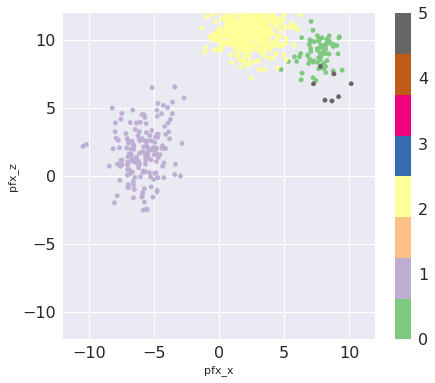

In [16]:
import matplotlib.cm as cm
chapman_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=chapman_df["pitch_type_id"], cmap=cm.Accent)

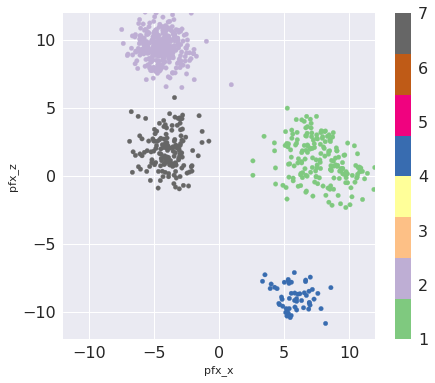

In [17]:
ohtani_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=ohtani_df["pitch_type_id"], cmap=cm.Accent)

[]

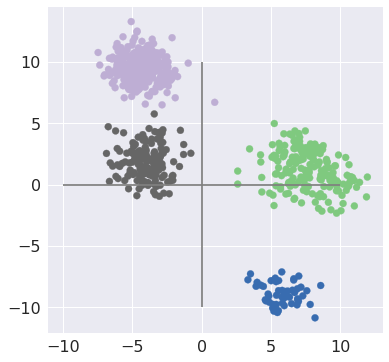

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(x=ohtani_df["pfx_x"], y=ohtani_df["pfx_z"], c=ohtani_df["pitch_type_id"], cmap=cm.Accent)
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.plot()

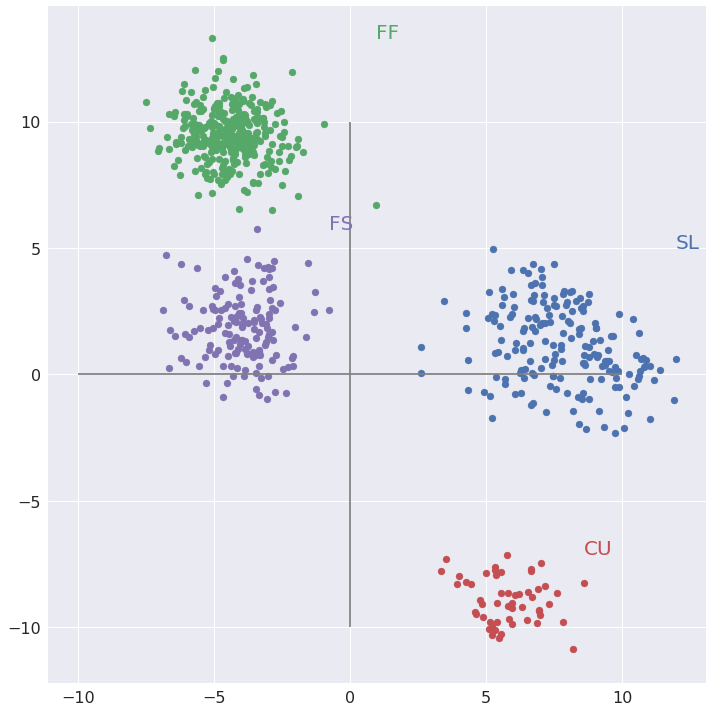

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10),tight_layout=True)

x_term = "pfx_x"
y_term = "pfx_z"

for ball_type in ohtani_df["pitch_type"].unique():
    tmp_df = ohtani_df[ohtani_df["pitch_type"]==ball_type]
    path = ax.scatter(x=tmp_df[x_term], y=tmp_df[y_term])
    plt.text(tmp_df[x_term].max(), tmp_df[y_term].max(), ball_type, fontsize=20, color=path.get_facecolor()[0])
#     print(path.get_facecolor()[0])
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.show()

* 球種別被打率
* 直前の球種・コース・速度など属性に入れて決定木で打たれる打たれないの分類  
　直前の球種・コース・速度と交互作用項も入れて  
　→ 何が打たれやすいか（球種・速度・直前の球種との兼ね合いとかとか）

In [20]:
ohtani_df

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
40693,1,bottom,660271,543760,R,SL,81.5,74.7,106.612,1415.788,7.778194,2.320582,0.209670,3.433696,-2.237738,50.0,11.101823,22.703018,-28.861880,3.368222,-118.717215,0.028016,3.329010,1.459250,23.8,-22.0,8.8,12.0,33.0,NaN,NaN,S,S,25,Swinging Strike,2018-04-01 20:14:09+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40694,1,bottom,660271,543760,R,SL,83.6,76.8,120.709,1467.112,7.010907,4.164236,0.239599,3.669399,-2.227319,50.0,10.581381,22.471270,-25.889075,3.746613,-121.701608,-0.279185,3.586549,1.657899,23.8,-23.4,7.6,12.0,33.0,NaN,NaN,B,B,26,Ball,2018-04-01 20:14:29+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40695,1,bottom,660271,476704,L,SL,83.7,76.4,121.516,1375.461,6.536371,4.007907,-0.970258,4.208338,-2.373291,50.0,9.854621,23.627923,-26.131491,1.333821,-121.926649,0.969022,3.567411,1.665165,23.8,-21.2,7.5,11.0,36.0,NaN,NaN,B,B,35,Ball,2018-04-01 20:16:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40700,2,bottom,660271,501981,R,SL,81.7,75.2,103.904,1004.585,5.545926,1.372928,-0.383614,3.026456,-2.297629,50.0,7.993412,21.428396,-30.195231,2.808068,-118.922180,-0.911539,3.803499,1.705152,23.9,-15.5,8.8,4.0,56.0,NaN,NaN,S,C,92,Called Strike,2018-04-01 20:32:58+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
40701,2,bottom,660271,501981,R,SL,82.2,75.1,107.146,1501.554,8.150797,2.514680,-0.404470,4.053447,-2.279994,50.0,11.838293,22.874340,-28.521704,1.930547,-119.699813,1.039250,3.389016,1.448805,23.8,-23.2,8.6,11.0,20.0,NaN,NaN,S,S,93,Swinging Strike,2018-04-01 20:33:16+00:00,gid_2018_04_01_anamlb_oakmlb_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457167,4,top,660271,460086,L,FS,81.2,74.3,270.799,751.974,-4.306007,-0.059990,-0.842587,5.258551,-1.798684,50.0,-6.120555,21.122415,-32.259318,3.544202,-118.095293,4.398790,3.261391,1.630699,23.8,9.9,9.1,11.0,35.0,NaN,NaN,B,B,216,Ball,2018-06-07 03:14:33+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457168,4,top,660271,572365,L,FS,84.3,76.9,229.857,1069.569,-4.581086,3.863401,0.970697,1.820884,-1.825517,50.0,-6.901699,25.972389,-26.353588,8.170170,-122.461812,-4.380234,3.311626,1.603111,23.8,11.0,7.5,14.0,97.0,NaN,NaN,B,B,238,Ball,2018-06-07 03:19:59+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457169,4,top,660271,501659,L,FS,85.0,76.8,255.999,1091.489,-5.917752,1.475526,-0.974862,2.291862,-2.054312,50.0,-9.020150,27.861659,-29.924974,4.477525,-123.564313,-2.911444,3.216229,1.507557,23.7,14.8,8.4,13.0,34.0,NaN,NaN,B,B,248,Ball,2018-06-07 03:22:35+00:00,gid_2018_06_06_kcamlb_anamlb_1,7
457170,4,top,660271,501659,L,FS,85.2,78.3,255.146,1134.215,-6.075809,1.611432,0.805651,0.755233,-1.732514,50.0,-9.346797,26.278608,-29.695082,8.099401,-123.688767,-6.392707,3.216226,1.462247,23.8,14.1,8.4,14.0,27.0,NaN,NaN,S,S,249,Swinging Strike,2018-06-07 03:22:57+00:00,gid_2018_06_06_kcamlb_anamlb_1,7


In [21]:
p_df
names_df
with_name = pd.merge(p_df, names_df, left_on="pitcher_id", right_on="id")

In [22]:
with_name.sort_values(by="start_speed", ascending=False)

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id,id,first_name,last_name
23217,9,top,663855,546318,L,SI,105.0,96.8,239.376,2214.530,-8.400257,4.972451,-1.277165,2.289863,-1.358954,50.0,-20.089112,34.279882,-20.282492,3.561292,-152.936501,-8.067941,3.147785,1.460261,23.8,41.2,5.0,13.0,47.0,NaN,NaN,S,F,528,Foul,2018-05-20 21:03:07+00:00,gid_2018_05_20_phimlb_slnmlb_1,0,663855,Jordan,Hicks
23215,9,top,663855,546318,L,SI,105.0,94.7,242.153,2340.826,-9.311415,4.919048,-2.426082,3.295568,-1.494576,50.0,-21.792182,40.942503,-20.661642,0.829343,-152.750448,-5.389091,3.343799,1.631216,23.7,44.3,5.4,11.0,35.0,NaN,NaN,B,B,526,Ball,2018-05-20 21:02:00+00:00,gid_2018_05_20_phimlb_slnmlb_1,0,663855,Jordan,Hicks
23460,7,bottom,663855,572041,R,SI,104.4,95.2,242.812,2138.691,-8.515724,4.374175,-1.474145,2.259285,-1.100167,50.0,-19.903922,36.512927,-21.950227,2.196874,-151.788679,-7.975468,3.434886,1.574123,23.8,39.1,5.3,13.0,23.0,NaN,NaN,S,S,557,Swinging Strike,2018-07-05 04:59:47+00:00,gid_2018_07_04_slnmlb_arimlb_1,0,663855,Jordan,Hicks
16987,9,top,547973,660670,R,SI,104.4,94.8,139.335,2794.711,8.170763,9.510659,1.797185,2.908120,0.695054,50.0,19.083164,37.945226,-9.961499,0.123304,-152.019106,-7.450730,3.395702,1.399594,23.8,-58.3,3.9,12.0,28.0,NaN,NaN,B,B,572,Ball,2018-07-03 02:02:16+00:00,gid_2018_07_02_atlmlb_nyamlb_1,0,547973,Aroldis,Chapman
16979,9,top,547973,443558,R,SI,104.3,95.9,140.886,2487.866,6.965795,8.566961,0.342660,2.671695,0.401364,50.0,16.432329,33.797382,-11.964566,-2.905581,-151.890909,-7.876242,3.485684,1.506673,23.8,-49.1,3.6,6.0,34.0,NaN,NaN,X,X,645,"In play, out(s)",2018-06-21 02:28:16+00:00,gid_2018_06_20_seamlb_nyamlb_1,0,547973,Aroldis,Chapman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468071,7,top,600303,451594,L,CU,53.2,49.3,41.285,1113.390,6.613939,-7.532198,-0.055884,1.377163,-1.485219,50.0,3.895460,11.072835,-36.610343,0.863558,-76.929372,4.726141,3.571956,1.678346,23.9,-6.2,24.9,13.0,24.0,NaN,NaN,B,B,624,Ball,2018-07-20 21:21:29+00:00,gid_2018_07_20_slnmlb_chnmlb_1,4,600303,Tommy,La Stella
385157,7,top,541650,523253,R,CH,51.9,48.9,202.532,1213.524,-4.176923,10.067513,1.478787,1.083703,-0.821669,50.0,-2.414190,8.608459,-26.355199,4.239176,-75.314146,-0.134835,3.472899,1.552656,24.0,4.5,18.4,14.0,39.0,NaN,NaN,B,B,518,Ball,2018-07-22 20:26:55+00:00,gid_2018_07_22_lanmlb_milmlb_1,5,541650,Hernan,Perez
468648,8,bottom,408314,475582,R,CU,48.6,44.8,110.240,513.054,4.733892,1.745512,-0.442042,3.073468,-1.618849,50.0,2.315658,8.454121,-31.320204,0.772708,-69.789734,6.597887,3.490000,1.601000,23.9,-4.4,25.4,1.0,27.0,NaN,NaN,S,F,746,Foul,2018-08-01 02:08:51+00:00,gid_2018_07_31_nynmlb_wasmlb_1,4,408314,Jose,Reyes
385125,7,top,541650,605131,R,SL,48.0,44.7,184.186,590.449,-0.420931,5.749371,-2.963067,4.253550,-1.125614,50.0,-0.205729,7.211787,-29.364056,-2.443696,-69.227449,7.077527,3.752943,1.632669,23.9,0.8,23.7,11.0,8.0,NaN,NaN,B,NaN,529,Hit By Pitch,2018-07-22 20:29:22+00:00,gid_2018_07_22_lanmlb_milmlb_1,1,541650,Hernan,Perez


In [23]:
p_df[p_df["pitcher_id"]==547973]

,inning_num,top_bottom,pitcher_id,batter_id,batter_stand,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,break_y,break_angle,break_length,zone,nasty,cc,mt,type,code,event_num,des,tfs_zulu,gid,pitch_type_id
264,9,bottom,547973,434778,R,SI,100.2,90.9,135.821,2472.382,8.043847,8.277558,-0.023020,4.147402,0.318896,50.0,17.335538,34.695806,-14.334834,-3.994046,-145.964318,-3.273614,3.323557,1.454467,23.8,-47.3,4.2,11.0,18.0,NaN,NaN,S,F,601,Foul,2018-03-29 22:59:22+00:00,gid_2018_03_29_nyamlb_tormlb_1,0
265,9,bottom,547973,434778,R,SI,99.5,90.5,144.820,2286.547,6.176172,8.761438,0.300408,4.293402,0.450957,50.0,13.166803,33.458644,-13.495792,-2.729672,-144.996416,-3.123079,3.237473,1.675859,23.8,-41.4,3.6,12.0,29.0,NaN,NaN,S,S,602,Swinging Strike,2018-03-29 23:00:29+00:00,gid_2018_03_29_nyamlb_tormlb_1,0
621,9,bottom,547973,518626,R,SI,100.5,91.6,140.240,2632.943,7.857642,9.444026,0.059379,2.410336,0.506181,50.0,16.972614,35.216682,-11.774826,-4.231119,-146.220262,-8.178177,3.304541,1.405062,23.8,-49.3,4.0,5.0,21.0,NaN,NaN,S,F,503,Foul,2018-03-31 01:45:35+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
622,9,bottom,547973,475253,R,SI,100.8,91.7,135.788,2369.560,7.659606,7.873077,0.907567,2.758918,0.607910,50.0,16.724285,34.765022,-14.983664,-2.015733,-146.841021,-6.624882,3.355719,1.506648,23.8,-44.5,4.3,12.0,53.0,NaN,NaN,S,S,510,Swinging Strike,2018-03-31 01:48:06+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
623,9,bottom,547973,456665,R,SI,100.2,91.4,142.411,2475.078,7.045909,9.152552,-0.152844,1.341939,0.638517,50.0,15.153983,33.643120,-12.489206,-4.910409,-145.613991,-10.485022,3.497478,1.627164,23.8,-43.4,3.9,13.0,42.0,NaN,NaN,B,B,520,Ball,2018-03-31 01:50:19+00:00,gid_2018_03_30_nyamlb_tormlb_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387820,9,top,547973,518586,R,CH,91.9,84.7,122.365,2154.821,9.180000,5.817763,1.095821,1.566346,0.275703,50.0,16.805857,26.906637,-21.523450,-0.991766,-133.957741,-6.455805,3.892581,1.789722,23.9,-36.1,6.2,14.0,57.0,NaN,NaN,B,B,580,Ball,2018-07-03 02:04:47+00:00,gid_2018_07_02_atlmlb_nyamlb_1,5
388215,9,top,547973,435559,R,CH,91.2,84.1,130.391,2271.525,8.816647,7.501025,0.751202,2.103692,0.338098,50.0,15.855021,27.255400,-18.684917,-1.927898,-132.952849,-5.768216,3.107187,1.427462,23.8,-37.9,5.7,14.0,62.0,NaN,NaN,X,X,697,"In play, out(s)",2018-07-04 02:56:08+00:00,gid_2018_07_03_atlmlb_nyamlb_1,5
392184,9,bottom,547973,446386,R,CH,88.1,81.5,123.735,2332.196,10.143713,6.773780,-0.118438,2.536572,0.260686,50.0,17.191073,23.633704,-20.694174,-4.336149,-128.591857,-3.987555,3.312659,1.454330,23.9,-37.5,6.4,5.0,40.0,NaN,NaN,S,C,608,Called Strike,2018-07-13 02:16:54+00:00,gid_2018_07_12_nyamlb_clemlb_1,5
397715,9,top,547973,444876,R,CH,91.0,83.8,135.941,2179.480,7.791636,8.051759,0.058893,1.206358,0.312115,50.0,13.845897,28.576935,-17.865908,-3.309146,-132.535662,-8.040327,3.411000,1.565000,23.8,-33.9,5.4,14.0,31.0,NaN,NaN,S,F,590,Foul,2018-07-29 20:00:13+00:00,gid_2018_07_29_kcamlb_nyamlb_1,5


### 回転数

In [24]:
with_name[(with_name["pitch_type"]=="FF")|(with_name["pitch_type"]=="FT")|(with_name["pitch_type"]=="FA")].groupby(["pitcher_id","first_name","last_name"])[["spin_rate"]].mean().reset_index().sort_values(by="spin_rate",ascending=False).head(30)

,pitcher_id,first_name,last_name,spin_rate
17,434378,Justin,Verlander,2769.785025
226,543045,Adam,Conley,2698.831554
658,664641,Ariel,Miranda,2676.853111
514,612434,Miguel,Castro,2652.189000
565,624586,James,Hoyt,2637.729100
412,596720,Dovydas,Neverauskas,2578.508939
599,642008,Jacob,Rhame,2574.462543
587,641729,Joe,Jimenez,2528.802242
509,608716,Drew,Steckenrider,2519.704484
225,543037,Gerrit,Cole,2489.470048


#### 434378	= Justin Verlander

In [25]:
ver_df = with_name[with_name["pitcher_id"]==434378]

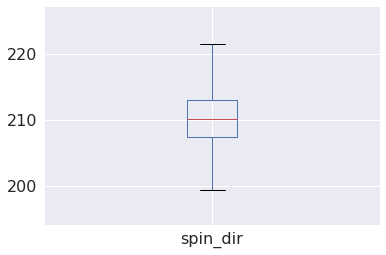

In [26]:
ver_df[ver_df["pitch_type"]=="FF"][["spin_dir"]].boxplot()

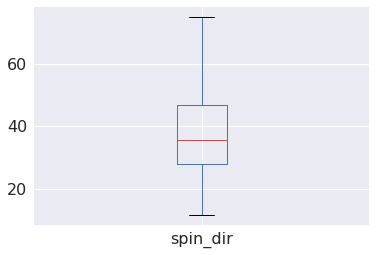

In [27]:
ax =ver_df[ver_df["pitch_type"]=="CU"][["spin_dir"]].boxplot()

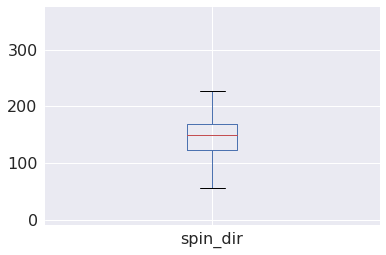

In [28]:
ver_df[ver_df["pitch_type"]=="SL"][["spin_dir"]].boxplot()

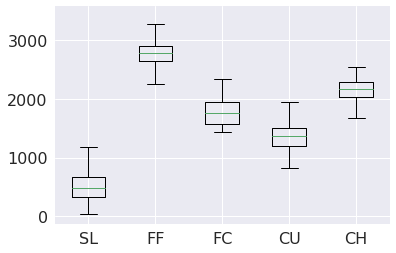

In [29]:
types = ver_df["pitch_type"].unique()

fig, ax = plt.subplots()
ax.boxplot([ver_df[ver_df["pitch_type"]==t]["spin_rate"] for t in types], labels=types)
plt.show()

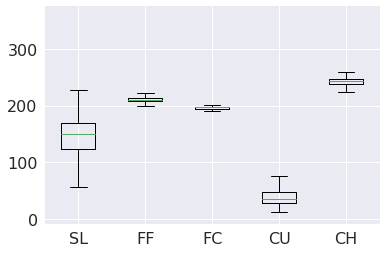

In [30]:
types = ver_df["pitch_type"].unique()

fig, ax = plt.subplots()
ax.boxplot([ver_df[ver_df["pitch_type"]==t]["spin_dir"] for t in types], labels=types)
plt.show()

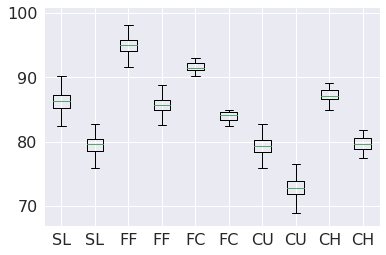

In [31]:
types = ver_df["pitch_type"].unique()

data_list = []
label_list = []
for t in types:
    data_list.append(ver_df[ver_df["pitch_type"]==t]["start_speed"])
    data_list.append(ver_df[ver_df["pitch_type"]==t]["end_speed"])
    label_list.append("{}".format(t))
    label_list.append("{}".format(t))

fig, ax = plt.subplots()
ax.boxplot(data_list, labels=label_list)
plt.show()

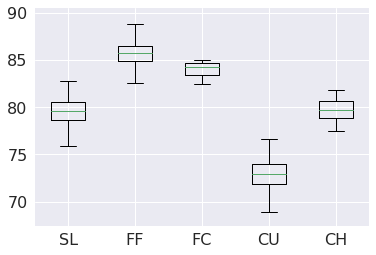

In [32]:
types = ver_df["pitch_type"].unique()

fig, ax = plt.subplots()
ax.boxplot([ver_df[ver_df["pitch_type"]==t]["end_speed"] for t in types], labels=types)
plt.show()

In [33]:
ver_zone_df = ver_df[["pitch_type","code","type","start_speed","end_speed","spin_rate","px", "pz","sz_top","sz_bot"]].dropna()
ver_zone_df

,pitch_type,code,type,start_speed,end_speed,spin_rate,px,pz,sz_top,sz_bot
123876,SL,B,B,86.4,80.4,632.836,1.513814,-0.042885,3.333941,1.456163
123877,SL,B,B,86.5,80.0,596.139,0.821008,0.674407,3.586685,1.648580
123878,SL,W,S,86.3,79.8,589.414,1.476762,0.397500,3.245063,1.436997
123880,SL,B,B,87.9,81.3,451.407,1.721864,1.814507,3.052489,1.385892
123881,SL,F,S,87.5,80.6,553.003,-0.089122,2.038450,2.903138,1.215752
...,...,...,...,...,...,...,...,...,...,...
126227,CH,F,S,87.1,79.6,2129.334,-1.028931,2.236459,3.161668,1.343323
126228,CH,B,B,86.6,78.4,2247.584,-1.705137,3.770090,3.712979,1.667483
126229,CH,S,S,86.3,78.8,2234.674,0.278079,2.080654,3.645838,1.381927
126230,CH,B,B,87.4,78.9,1948.171,-1.554831,4.666469,3.433397,1.740146


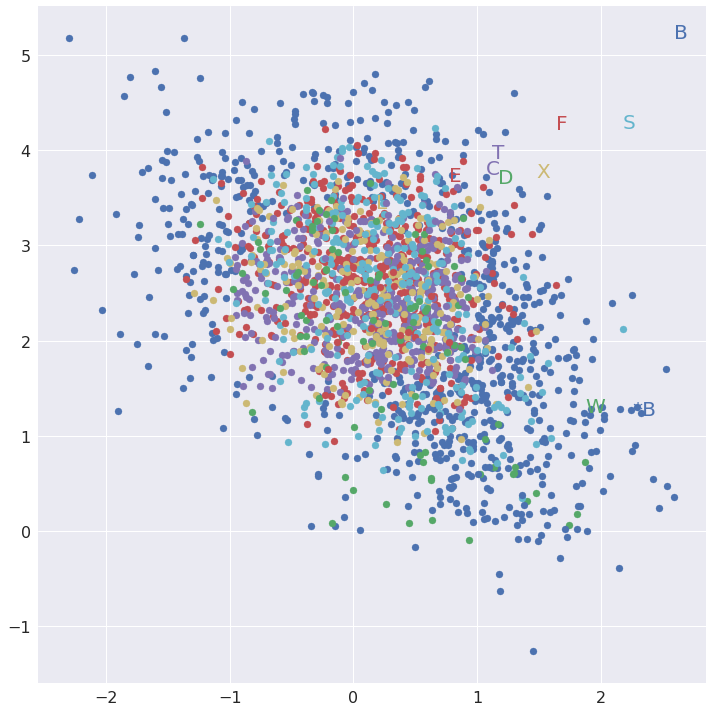

In [34]:
# ver_zone_df.plot(kind="scatter",x="px",y="pz",xlim=(-2.5,2.5),ylim=(-1,6),fig_size=(6,6))
fig, ax = plt.subplots(1, 1, figsize=(10, 10),tight_layout=True)

x_term = "px"
y_term = "pz"
p_type = "code"

for ball_type in ver_zone_df[p_type].unique():
    tmp_df = ver_zone_df[ver_zone_df[p_type]==ball_type]
    path = ax.scatter(x=tmp_df[x_term], y=tmp_df[y_term])
    plt.text(tmp_df[x_term].max(), tmp_df[y_term].max(), ball_type, fontsize=20, color=path.get_facecolor()[0])
#     print(path.get_facecolor()[0])
# plt.hlines(y=0,xmin=-2.5,xmax=2.5, colors="gray")
# plt.vlines(x=0,ymin=-0.5,ymax=5.5, colors="gray")
plt.show()

In [35]:
ver_zone_df[ver_zone_df["code"]!=ver_zone_df["code"]]

,pitch_type,code,type,start_speed,end_speed,spin_rate,px,pz,sz_top,sz_bot


In [39]:
with_name["diff_speed"] = with_name["start_speed"]-with_name["end_speed"]
with_name["diff_speed_rate"] = with_name["diff_speed"]/with_name["start_speed"]
diff_speed_df = with_name.groupby(["pitcher_id","first_name","last_name","pitch_type"])[["start_speed","end_speed","diff_speed_rate"]].agg({"start_speed": ["max","mean","min"],"end_speed": ["max","mean","min"], "diff_speed_rate":["mean","count"]}).reset_index().sort_values(by=("diff_speed_rate", "mean"))

diff_speed_df = diff_speed_df[diff_speed_df[("diff_speed_rate","count")]>=10]
diff_speed_df.head(30)

pitcher_id first_name  last_name pitch_type start_speed                   \
                                                         max       mean   min   
2760     642701     Dennis    Santana         SL        85.3  80.388000  75.4   
1428     572044     Brooks   Pounders         SL        89.6  85.857018  82.5   
810      518614     Daniel   Descalso         SL        75.7  70.315385  64.6   
2854     656546       Jeff    Hoffman         SL        88.7  86.044737  84.1   
2759     642701     Dennis    Santana         FT        96.7  92.916216  88.5   
127      445197       Mike       Dunn         SL        88.7  85.717600  82.7   
1172     543734      Chris      Rusin         SL        84.5  83.062500  81.9   
2852     656546       Jeff    Hoffman         CU        78.5  76.390476  74.5   
1599     592351        Jon       Gray         CU        83.1  80.090647  74.9   
1168     543734      Chris      Rusin         CU        81.9  80.340909  78.5   
524      488671       Alex      Avila         CU        81.1  75.269231  71.2   
669      502043       Kyle     Gibson         CU        83.8  80.647917  75.0   
1598     592351        Jon       Gray         CH        89.7  87.000000  84.5   
2851     656546       Jeff    Hoffman         CH        88.1  86.564000  84.2   
997      542881      Tyler   Anderson         FC        91.3  87.476855  83.1   
2480     622608    Antonio  Senzatela         CU        80.1  77.979310  74.6   
222      451584       Wade      Davis         FC        93.5  89.615766  86.2   
1489     573046       Mike      Morin         SL        86.1  84.229412  82.0   
2442     622075      Yency    Almonte         SL        90.7  88.300000  85.7   
2795     643466   Harrison   Musgrave         SL        86.3  82.826400  79.0   
482      474463      Brett   Anderson         SL        85.3  81.799438  78.6   
2145     607074     Carlos      Rodon         SL        90.8  85.940455  78.7   
1255     548357  Christian    Bergman         CU        79.8  76.868000  74.1   
1488     573046       Mike      Morin         FT        92.5  91.170000  90.2   
552      489119       Wade      Miley         SL        85.7  82.611111  79.1   
135      445276     Kenley     Jansen         SL        86.4  82.716000  76.5   
2308     608717      Chris   Stratton         SL        86.2  83.161017  80.6   
2911     657786      Jerry      Vasto         FF        93.3  91.220000  89.5   
2934     664192       Joey   Lucchesi         CU        81.7  78.856459  73.2   
2965     669456      Shane     Bieber         SL        85.9  83.182723  79.9   

     end_speed                  diff_speed_rate        
           max       mean   min            mean count  
2760      81.0  75.780000  70.2        0.057355    25  
1428      84.1  80.455263  77.4        0.062902   114  
810       71.6  65.861538  60.3        0.063411    13  
2854      83.5  80.565789  77.6        0.063717    38  
2759      91.0  86.964865  82.5        0.064095    37  
127       83.7  80.106400  76.9        0.065488   125  
1172      78.8  77.562500  76.1        0.066182    16  
2852      73.2  71.323810  68.8        0.066328    21  
1599      79.2  74.773741  68.4        0.066442   278  
1168      76.8  74.972727  73.0        0.066805    22  
524       76.1  70.215385  66.6        0.067204    13  
669       79.1  75.183750  70.1        0.067777   240  
1598      83.9  81.080769  78.2        0.068035    26  
2851      82.2  80.648000  78.5        0.068324    25  
997       85.3  81.499647  76.8        0.068325   566  
2480      75.3  72.644828  69.5        0.068426    29  
222       87.3  83.481532  78.7        0.068460   222  
1489      80.3  78.452941  75.7        0.068568    17  
2442      84.8  82.230435  79.9        0.068754    23  
2795      81.0  77.126400  72.6        0.068830   125  
482       80.0  76.160674  72.4        0.068931   178  
2145      85.4  79.989545  73.2        0.069254   220  
1255      73.9  71.540000  69.2        0.069269    25  
1488      86

In [40]:
diff_speed_df.sort_values(by=("diff_speed_rate", "mean"), ascending=False).head(30)

pitcher_id first_name     last_name pitch_type start_speed             \
                                                            max       mean   
2574     628318   Kazuhisa        Makita         CU        62.6  59.130000   
2944     664641      Ariel       Miranda         FF        92.9  90.701852   
2551     624586      James          Hoyt         FF        94.6  92.880000   
2578     628318   Kazuhisa        Makita         SL        73.5  69.971642   
88       434378     Justin     Verlander         FF        99.2  94.957133   
2491     622766     Miguel          Diaz         FF        97.9  96.805263   
1668     592761      Caleb         Smith         FF        95.4  92.711873   
883      519242      Chris          Sale         FF       100.7  95.519589   
1430     572070    Garrett      Richards         CU        84.8  81.033813   
401      461325      Tyler      Clippard         SL        92.6  89.800000   
2631     641482     Nestor       Cortes          FF        91.1  87.864179   
1291     570632       Jose         Urena         FF        97.8  95.683673   
631      501925        Joe         Smith         FF        89.7  88.179687   
959      527055     Arodys      Vizcaino         FF        99.5  97.513208   
2837     656186        Dan     Altavilla         FF        99.4  95.994180   
2710     642073     Jimmie        Sherfy         FF        96.5  94.774286   
166      448178      Kevin        Jepsen         FF        94.6  91.974737   
1864     596074      Bobby        Poyner         FF        91.6  90.012500   
1553     592130      Danny        Barnes         FF        94.6  91.942297   
745      502748       Brad       Peacock         FF        95.6  93.563187   
1812     595032      Chase       Whitley         FF        88.0  86.736364   
2457     622217      Chris       O'Grady         FF        90.2  87.319608   
420      462136      Marco       Estrada         FF        91.4  88.905644   
1364     571735      David          Hale         FF        94.5  91.239024   
1046     543045       Adam        Conley         FF        97.7  94.837269   
1392     571901      Aaron          Loup         CU        78.4  76.003571   
1793     594902        Ben        Lively         FF        93.4  90.917391   
2300     608716       Drew  Steckenrider         FF        97.1  94.516140   
594      500724         JC       Ramirez         FT        96.0  92.827778   
1674     592773       Ryne        Stanek         FF       100.5  98.015459   

           end_speed                  diff_speed_rate        
       min       max       mean   min            mean count  
2574  55.0      56.0  53.310000  50.0        0.098238    10  
2944  88.2      83.9  81.844444  79.5        0.097653    54  
2551  92.0      86.0  83.820000  82.7        0.097555    10  
2578  66.8      66.3  63.152239  60.7        0.097402    67  
88    89.9      89.4  85.717023  81.6        0.097305  1451  
2491  94.9      89.1  87.415789  86.3        0.096983    19  
1668  89.1      87.5  83.756059  79.8        0.096607   817  
883   86.1      92.1  86.374849  76.7        0.095813   827  
1430  76.5      77.8  73.312950  68.8        0.095300   139  
401   82.1      84.4  81.246154  73.4        0.095247    26  
2631  84.5      82.6  79.505970  76.1        0.095107    67  
1291  92.5      89.9  86.591837  81.8        0.095068    49  
631   86.3      83.0  79.831250  77.5        0.094687   128  
959   95.3      90.7  88.303774  86.0        0.094447    53  
2837  91.0      89.8  86.931217  82.9        0.094397   189  
2710  92.3      87.6  85.828571  84.2        0.094384    35  
166   88.3      86.8  83.305263  79.8        0.094258   190  
1864  88.1      83.7  81.533036  78.7        0.094212   112  
1553  88.5      86.1  83.289076  80.1        0.094107   357  
745   90.9      87.7  84.759890  80.6        0.094081   182  
1812  85.7      80.0  78.590909  77.4        0.093914    11  
2457  84.2      82.7  79.121569  75.3        0.093895    51  
420   85.0      83.5